In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

file_path = "./PM2.5/BeijingPM20100101_20151231.csv"
df = pd.read_csv(file_path)
print(df.head())
print(df.info())
# 可以看出在这个表格中的数据是把年月日小时分开来的

   No  year  month  day  hour  season  PM_Dongsi  PM_Dongsihuan  \
0   1  2010      1    1     0       4        NaN            NaN   
1   2  2010      1    1     1       4        NaN            NaN   
2   3  2010      1    1     2       4        NaN            NaN   
3   4  2010      1    1     3       4        NaN            NaN   
4   5  2010      1    1     4       4        NaN            NaN   

   PM_Nongzhanguan  PM_US Post  DEWP  HUMI    PRES  TEMP cbwd    Iws  \
0              NaN         NaN -21.0  43.0  1021.0 -11.0   NW   1.79   
1              NaN         NaN -21.0  47.0  1020.0 -12.0   NW   4.92   
2              NaN         NaN -21.0  43.0  1019.0 -11.0   NW   6.71   
3              NaN         NaN -21.0  55.0  1019.0 -14.0   NW   9.84   
4              NaN         NaN -20.0  51.0  1018.0 -12.0   NW  12.97   

   precipitation  Iprec  
0            0.0    0.0  
1            0.0    0.0  
2            0.0    0.0  
3            0.0    0.0  
4            0.0    0.0  
<class '

In [9]:
# 之前所学习的DatetimeIndex可以理解为时间戳
# 那么现在我们要学习的PeriodIndex可以理解为时间段
periods = pd.PeriodIndex(year=df["year"],month=df["month"],day=df["day"],hour=df["hour"],freq="H")
print(periods)

# 把分开的时间字符串转化为时间戳
df["datetime"] = periods
print(df.head())

# 把datetime设置为索引
df.set_index("datetime", inplace=True)

# 给这个时间段降采样
# data = df.resample("10D").mean()
print(df)

PeriodIndex(['2010-01-01 00:00', '2010-01-01 01:00', '2010-01-01 02:00',
             '2010-01-01 03:00', '2010-01-01 04:00', '2010-01-01 05:00',
             '2010-01-01 06:00', '2010-01-01 07:00', '2010-01-01 08:00',
             '2010-01-01 09:00',
             ...
             '2015-12-31 14:00', '2015-12-31 15:00', '2015-12-31 16:00',
             '2015-12-31 17:00', '2015-12-31 18:00', '2015-12-31 19:00',
             '2015-12-31 20:00', '2015-12-31 21:00', '2015-12-31 22:00',
             '2015-12-31 23:00'],
            dtype='period[H]', length=52584)
                  No  year  month  day  hour  season  PM_Dongsi  \
datetime                                                          
2010-01-01 00:00   1  2010      1    1     0       4        NaN   
2010-01-01 01:00   2  2010      1    1     1       4        NaN   
2010-01-01 02:00   3  2010      1    1     2       4        NaN   
2010-01-01 03:00   4  2010      1    1     3       4        NaN   
2010-01-01 04:00   5  2010     

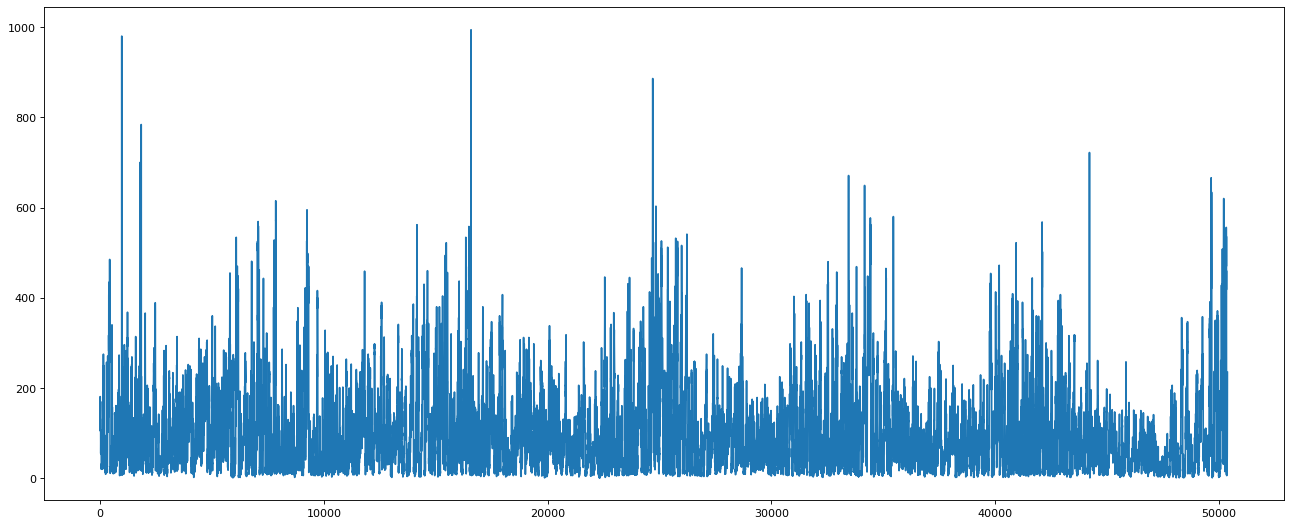

In [10]:
# 处理缺失数据
# print(df["PM_US Post"])
data = df["PM_US Post"].dropna()

_x = data.index
_y = data.values
plt.figure(figsize=(20, 8), dpi=80)
plt.plot(range(len(_x)), _y)
# plt.xticks(range(len(_x)), _x, rotation=90)
plt.show()

(313, 17)


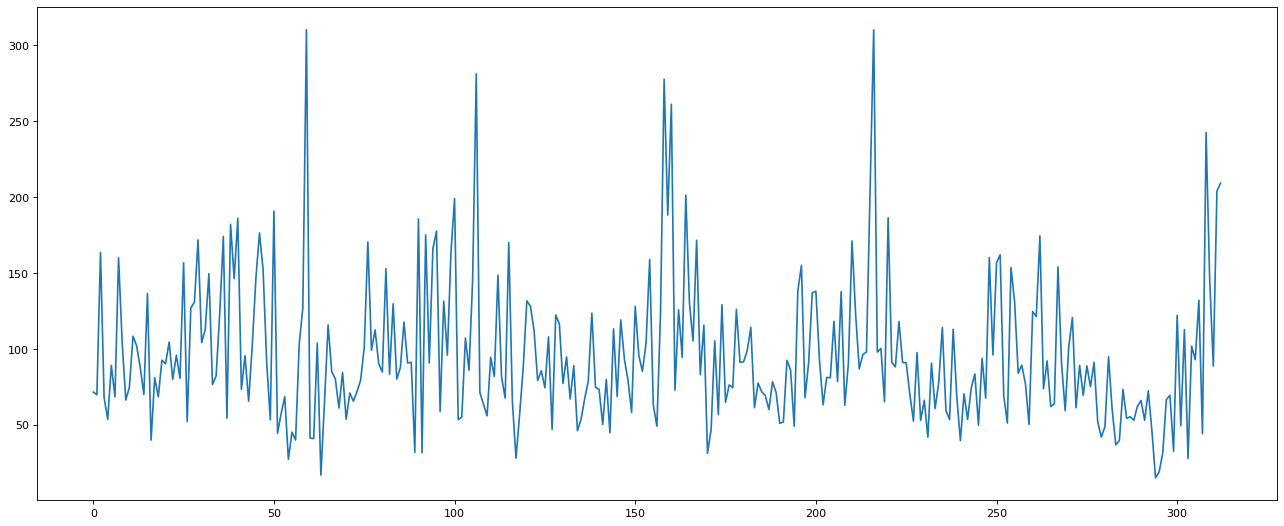

In [18]:
# 需要降采样
numeric_cols = df.select_dtypes(include=[np.number])
data = numeric_cols.resample("7D").mean()
print(data.shape)

# 处理缺失数据
# print(df["PM_US Post"])
data = data["PM_US Post"].dropna()

_x = data.index
_y = data.values
plt.figure(figsize=(20, 8), dpi=80)
plt.plot(range(len(_x)), _y)
# plt.xticks(range(len(_x)), _x, rotation=90)
plt.show()

               No    year     month        day  hour  season  PM_Dongsi  \
datetime                                                                  
2010-01-01   84.5  2010.0  1.000000   4.000000  11.5     4.0        NaN   
2010-01-08  252.5  2010.0  1.000000  11.000000  11.5     4.0        NaN   
2010-01-15  420.5  2010.0  1.000000  18.000000  11.5     4.0        NaN   
2010-01-22  588.5  2010.0  1.000000  25.000000  11.5     4.0        NaN   
2010-01-29  756.5  2010.0  1.571429  14.285714  11.5     4.0        NaN   

            PM_Dongsihuan  PM_Nongzhanguan  PM_US Post       DEWP       HUMI  \
datetime                                                                       
2010-01-01            NaN              NaN   71.627586 -18.255952  54.395833   
2010-01-08            NaN              NaN   69.910714 -19.035714  49.386905   
2010-01-15            NaN              NaN  163.654762 -12.630952  57.755952   
2010-01-22            NaN              NaN   68.069307 -17.404762  34.0952

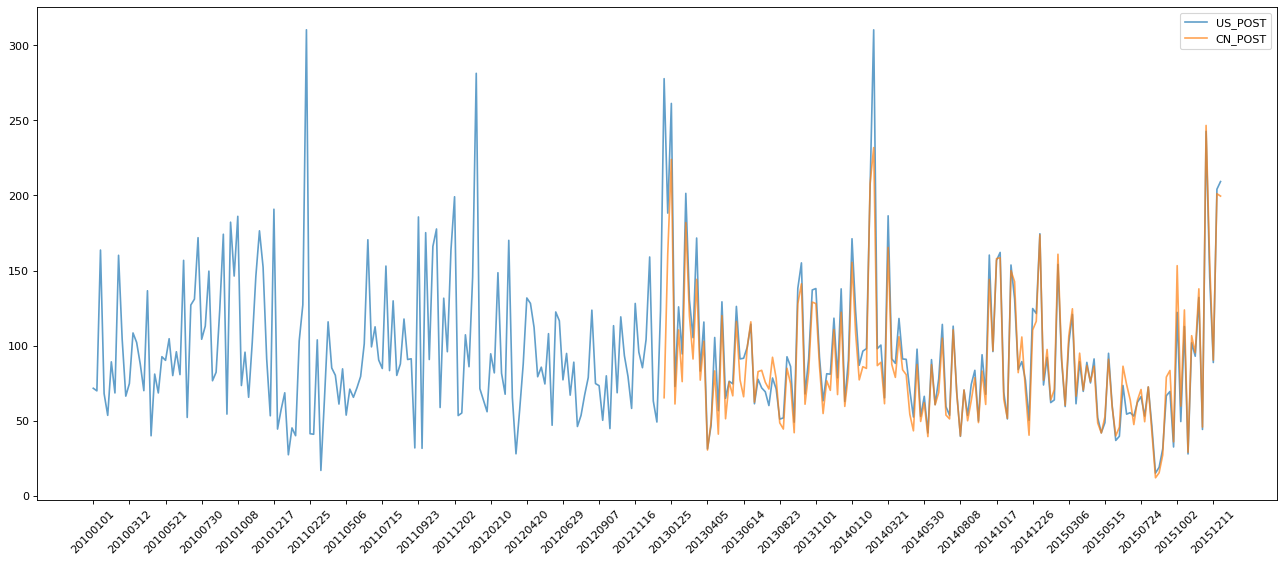

In [19]:
# coding=utf-8
import pandas as pd
from matplotlib import  pyplot as plt
file_path = "./PM2.5/BeijingPM20100101_20151231.csv"

df = pd.read_csv(file_path)

#把分开的时间字符串通过periodIndex的方法转化为pandas的时间类型
period = pd.PeriodIndex(year=df["year"],month=df["month"],day=df["day"],hour=df["hour"],freq="H")
df["datetime"] = period
# print(df.head(10))

#把datetime 设置为索引
df.set_index("datetime",inplace=True)

#进行降采样
df = df.select_dtypes(include=[np.number])
df = df.resample("7D").mean()
print(df.head())
#处理缺失数据，删除缺失数据
# print(df["PM_US Post"])

data  =df["PM_US Post"]
data_china = df["PM_Nongzhanguan"]

print(data_china.head(100))
#画图
_x = data.index
_x = [i.strftime("%Y%m%d") for i in _x]
_x_china = [i.strftime("%Y%m%d") for i in data_china.index]
print(len(_x_china),len(_x_china))
_y = data.values
_y_china = data_china.values


plt.figure(figsize=(20,8),dpi=80)

plt.plot(range(len(_x)),_y,label="US_POST",alpha=0.7)
plt.plot(range(len(_x_china)),_y_china,label="CN_POST",alpha=0.7)

plt.xticks(range(0,len(_x_china),10),list(_x_china)[::10],rotation=45)

plt.legend(loc="best")

plt.show()